# Preamble
The purpose of this notebook and its data is to better understand cancer care in Canada and how it changed from March 1, 2020 to April 18, 2020. This notebook was intended to help answer "How are patterns of care changing for current patients (i.e., cancer patients)?". Data used in this notebook came from Twitter and so the perspective on how cancer care has changed is from the general public/Twitter community from the 6 largest cities (plus 200km radius) in Canada. The referenced .csv file contains summary results from scraped tweets, not the tweets themselves. Details on how the tweets were obtained and summarized are provided in the README of this project's repository.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/vvbauman/Cancer-care-in-the-time-of-Covid-19/master/covid19_tweet_summary.csv"
df= pd.read_csv(url, error_bad_lines= False)
df.head()

,Search terms,City +200km radius,Start date,End date,Week number,Number of tweets,Number of unique users,Who's tweeting - public,Who's tweeting - doctors/healthcare org,Who's tweeting - news,Who's tweeting - gov,Content - virus fear/concern,Content - cancer treatment concern,Content - change to personal cancer treatment,Content - support/information,Content - misc (not directly related to virus or cancer)
0,Covid 19 AND cancer,Toronto,01-Mar-20,07-Mar-20,1,2,1,1,0,0,0,2,0,0,0,0
1,Covid 19 AND cancer,Toronto,08-Mar-20,14-Mar-20,2,1,1,1,0,0,0,0,0,0,0,1
2,Covid 19 AND cancer,Toronto,15-Mar-20,21-Mar-20,3,5,5,5,0,0,0,0,2,0,1,2
3,Covid 19 AND cancer,Toronto,22-Mar-20,28-Mar-20,4,12,11,10,1,0,0,2,2,1,5,2
4,Covid 19 AND cancer,Toronto,29-Mar-20,04-Apr-20,5,5,5,4,1,0,0,1,1,0,2,1


# Understanding the Tweet Summary Data
The first five columns contain information used to retrieve the tweets. The remaining columns contain information about the retrieved tweets themselves. For example, for row 0, tweets that contained the words "covid19" and "cancer" that were published within 200km of Toronto between March 1 and March 7, 2020 (inclusive) were retrieved. A total of 2 tweets met this criteria. 1 user published these tweets and is a member of the general public. The tweets themselves were about fear or concern regarding the virus.

# Visualizing the Tweet Summary Data
Since we can't tell based on the head of the dataframe, let's see how many tweets were retrieved, the search terms that were used to retrieve the tweets, and the Canadian cities that the tweets were published from.

In [5]:
group_terms= df.groupby('Search terms')['Number of tweets'].sum()
print('Total tweets retrieved across Canada from March 1 to April 18, 2020:', np.sum(group_terms))
print('Search terms used:', df['Search terms'].unique())
print('Where tweets are from:', df['City +200km radius'].unique())

Total tweets retrieved across Canada from March 1 to April 18, 2020: 545
Search terms used: ['Covid 19 AND cancer' 'Coronavirus AND cancer' 'Covid 19 AND oncology'
 'Coronavirus AND oncology']
Where tweets are from: ['Toronto' 'Montreal' 'Vancouver' 'Calgary' 'Edmonton' 'Ottawa']


Let's visualize the distribution of tweets - how many tweets contained each of the search terms and where people tweeted from.

Text(0, 0.5, 'Number of tweets')

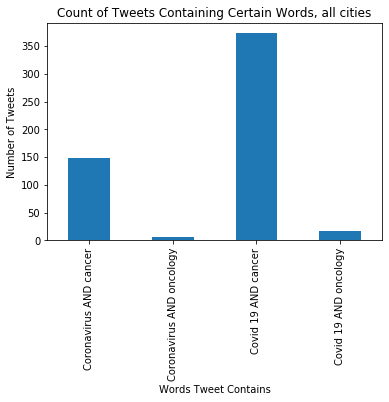

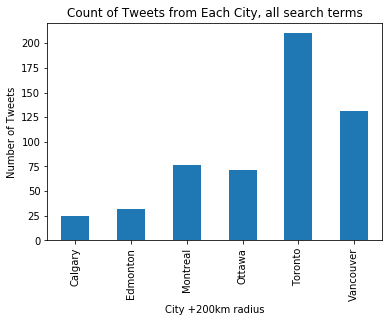

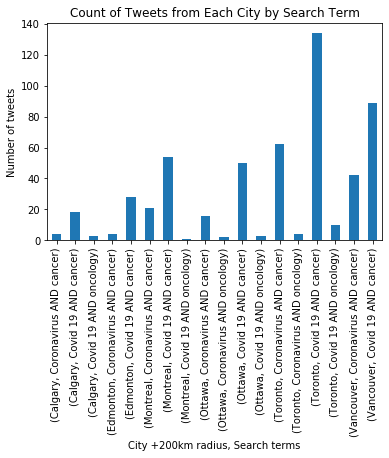

In [7]:
ax= group_terms.plot.bar(title= 'Count of Tweets Containing Certain Words, all cities')
ax.set_xlabel('Words Tweet Contains')
ax.set_ylabel('Number of Tweets')

plt.figure()
group_city= df.groupby('City +200km radius')['Number of tweets'].sum()
ax2= group_city.plot.bar(title= 'Count of Tweets from Each City, all search terms')
ax2.set_xlabel('City +200km radius')
ax2.set_ylabel('Number of Tweets')

plt.figure()
term_city= df.groupby(['City +200km radius', 'Search terms'])['Number of tweets'].sum()
ax3= term_city.plot.bar(title= 'Count of Tweets from Each City by Search Term')
ax3.set_xlabel('City +200km radius, Search terms')
ax3.set_ylabel('Number of tweets')

**A large proportion of tweets published from March 1, 2020 to April 18, 2020 that were related to Covid-19 and cancer contained the words "covid 19" and "cancer" and were tweeted from the Toronto and Vancouver areas.** We can also verify that not all tweets came from a small number of users and we can see who published the tweets (general public, doctors or healthcare organizations, news, or government).

Number of unique Twitter users that tweeted about Covid-19 and cancer: 438


Text(0.5, 1.0, "Distribution of Who's Tweeting about Covid-19 and Cancer")

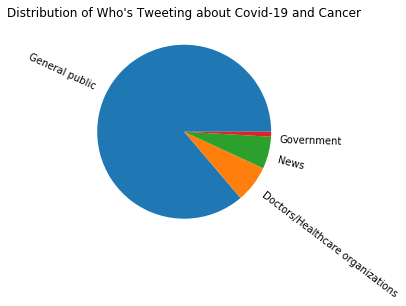

In [9]:
#get sum of each column of users tweeting and put in array so it can be easily plotted
users= np.array([['General public', 'Doctors/Healthcare organizations', 'News', 'Government'], [df["Who's tweeting - public"].sum(), df["Who's tweeting - doctors/healthcare org"].sum(), df["Who's tweeting - news"].sum(), df["Who's tweeting - gov"].sum()]])
print('Number of unique Twitter users that tweeted about Covid-19 and cancer:', df['Number of unique users'].sum())
plt.pie(users[1,:], labels= users[0,:], rotatelabels= True)
plt.title("Distribution of Who's Tweeting about Covid-19 and Cancer")

**The majority of people that tweeted about Covid-19 and cancer were members of the general public.** These users showed no indication of being a doctor, healthcare organization, news outlet, or member of a government anywhere in their twitter handle or username.

We can also visualize the distribution of when the tweets were published.

Text(0, 0.5, 'Number of tweets')

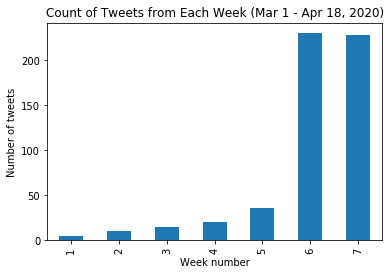

In [10]:
group_date= df.groupby('Week number')['Number of tweets'].sum()
ax_date= group_date.plot.bar(title= 'Count of Tweets from Each Week (Mar 1 - Apr 18, 2020)')
ax_date.set_ylabel('Number of tweets')

**From this plot, it is evident that there was an increase in discussion among the general public regarding Covid-19 and cancer from March 1, 2020 to April 18, 2020.** To better understand this discussion, the 545 scraped tweets were read and categorized into one of five categories: concern regarding the virus, concern regarding cancer, description of a change in personal cancer treatment, support/information related to Covid-19 and/or cancer, and other (not directly related to virus and/or cancer). Visualization of the distribution of the tweets regarding their content can be seen below.

([<matplotlib.patches.Wedge at 0x2071e6332c8>,
 [Text(1.0348614056953556, 0.3729100038913317, 'Virus concern'),
  Text(0.4464446643545258, 1.0053293796907434, 'Cancer concern'),
  Text(-0.06653803893730968, 1.0979857418811856, 'Change in cancer treatment'),
  Text(-0.9489076120007308, 0.556394054503704, 'Support/Info'),
  Text(0.23593365194328095, -1.0743999776064346, 'Other')])

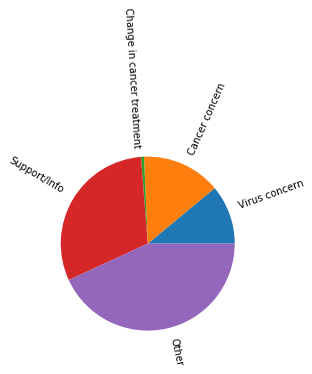

In [12]:
#get sum of each column of counts of tweet content and put in array so it can be easily plotted
tweet_cont= np.array([['Virus concern', 'Cancer concern', 'Change in cancer treatment', 'Support/Info', 'Other'], [df['Content - virus fear/concern'].sum(), df['Content - cancer treatment concern'].sum(), df['Content - change to personal cancer treatment'].sum(), df['Content - support/information'].sum(), df['Content - misc (not directly related to virus or cancer)'].sum()]])
plt.pie(tweet_cont[1,:], labels= tweet_cont[0,:], rotatelabels= True)

# Conclusion
The purpose of this notebook was to better understand cancer care in Canada and how it changed throughout the Covid-19 pandemic (from March 1 to April 18, 2020). Using Twitter as a data source and the particular tweets that were scraped and used in this notebook, we can conclude that there was an increase in coversations about Covid-19 and cancer as indicated by the increase in the number of tweets containing words related to Covid-19 and cancer. The majority of Canadians that tweeted about Covid-19 and cancer were from the Toronto and Vancouver areas and were of the general public. Although there is evidence that the amount of conversation increased, the Twitter data indicates that there was little to no change in cancer care in Canada from March 1, 2020 to April 18, 2020; the majority of tweets published during this time were not related to a change in one's cancer treatment. **This doesn't mean that cancer care did not change from March 1 to April 18, 2020.** Future work should include investigating quantitative data from hospitals.